In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
import math
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA
%matplotlib inline
from pandas import Series
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 10

In [2]:
dataset = pd.read_csv("BSE_30.csv", index_col = 'Date')
dataset.head()

,Symbol,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
5/6/2008,ADANIPORTS,150.000000,153.570007,147.820007,151.149994,134.313477,1782030.0
5/7/2008,ADANIPORTS,152.000000,154.460007,150.240005,153.309998,136.232864,1180015.0
5/8/2008,ADANIPORTS,152.199997,156.759995,150.199997,155.889999,138.525497,1856245.0
5/9/2008,ADANIPORTS,155.000000,160.600006,154.210007,156.520004,139.085312,3251375.0
5/12/2008,ADANIPORTS,156.000000,163.479996,151.000000,162.500000,144.399170,5031635.0


In [3]:
dataset.index = pd.to_datetime(dataset.index)

In [4]:
dataset = dataset.sort_index()
dataset

,Symbol,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2008-05-06,ADANIPORTS,150.000000,153.570007,147.820007,151.149994,134.313477,1782030.0
2008-05-06,TATASTEEL,766.981995,783.083008,760.312012,777.843018,598.932007,1339735.0
2008-05-06,SUNPHARMA,143.199997,145.500000,142.119995,144.059998,104.164421,57260.0
2008-05-06,DRREDDY,640.000000,653.500000,639.000000,643.799988,600.835571,35630.0
2008-05-06,RELIANCE,663.750000,670.974976,659.000000,663.599976,544.385803,2193024.0
2008-05-06,YESBANK,35.779999,36.000000,34.160000,34.889999,23.188095,1632340.0
2008-05-06,AXISBANK,190.000000,190.979996,186.820007,189.570007,114.078735,1925165.0
2008-05-06,HDFC,545.000000,549.000000,530.000000,543.630005,405.112762,570055.0
2008-05-06,POWERGRID,106.500000,106.800003,104.699997,105.150002,87.570213,915113.0


Text(0.5,1,'Stock Trends on yearly basis')

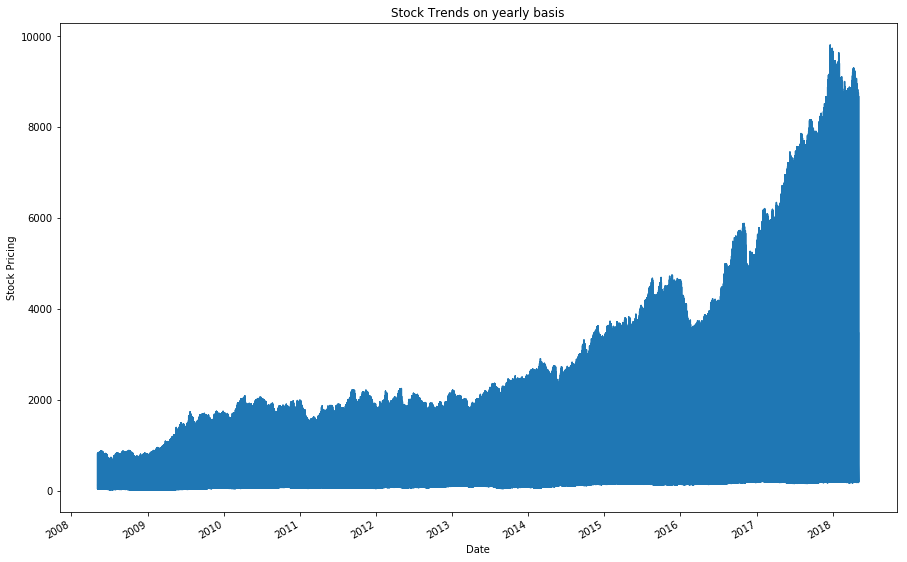

In [7]:
dataset['Close'].plot()
plt.ylabel("Stock Pricing")
plt.title("Stock Trends on yearly basis")

In [8]:
dataset = dataset['Close']
dataset.head()

Date
2008-05-06    151.149994
2008-05-06    777.843018
2008-05-06    144.059998
2008-05-06    643.799988
2008-05-06    663.599976
Name: Close, dtype: float64

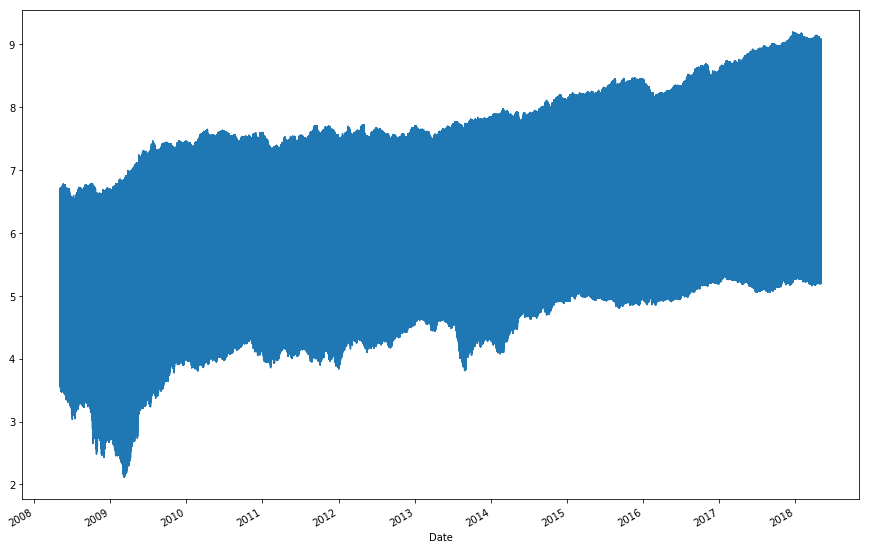

In [9]:
lnClose = np.log(dataset)
lnClose
lnClose.plot()

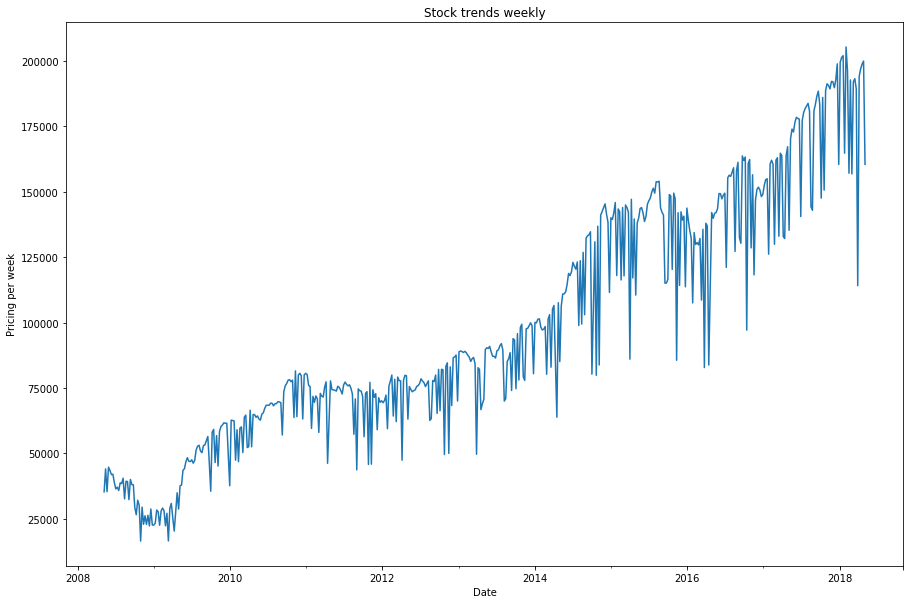

In [10]:
week = dataset.resample('W').sum()
plt.ylabel("Pricing per week")
plt.title("Stock trends weekly")
week.plot()

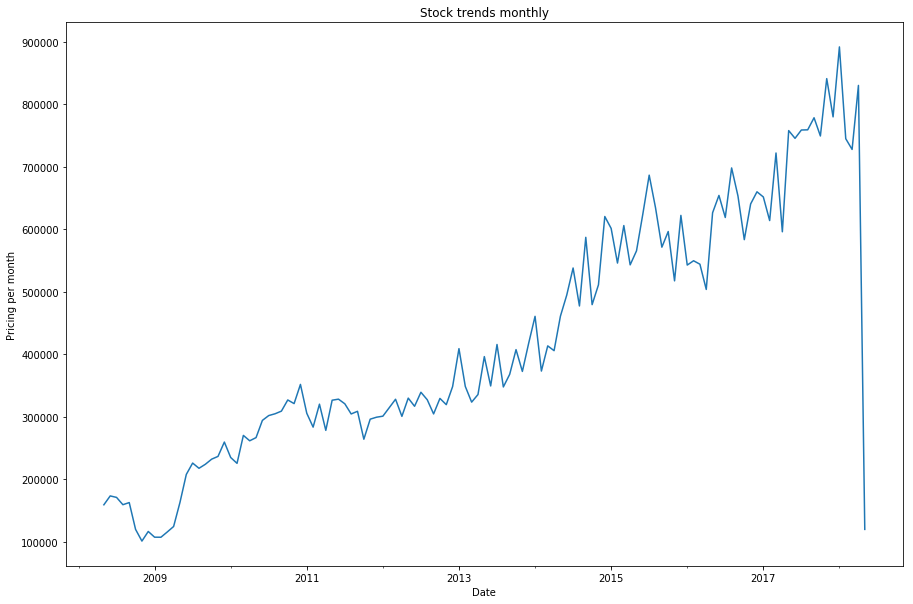

In [11]:
month = dataset.resample('M').sum()
plt.ylabel("Pricing per month")
plt.title("Stock trends monthly")
month.plot()

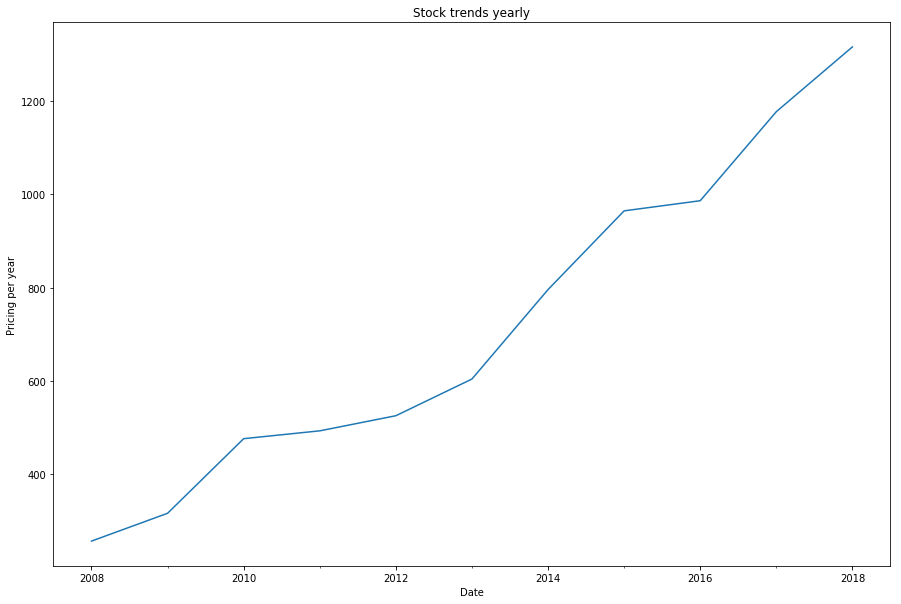

In [12]:
year = dataset.resample('Y').mean()
plt.ylabel("Pricing per year")
plt.title("Stock trends yearly")
year.plot()

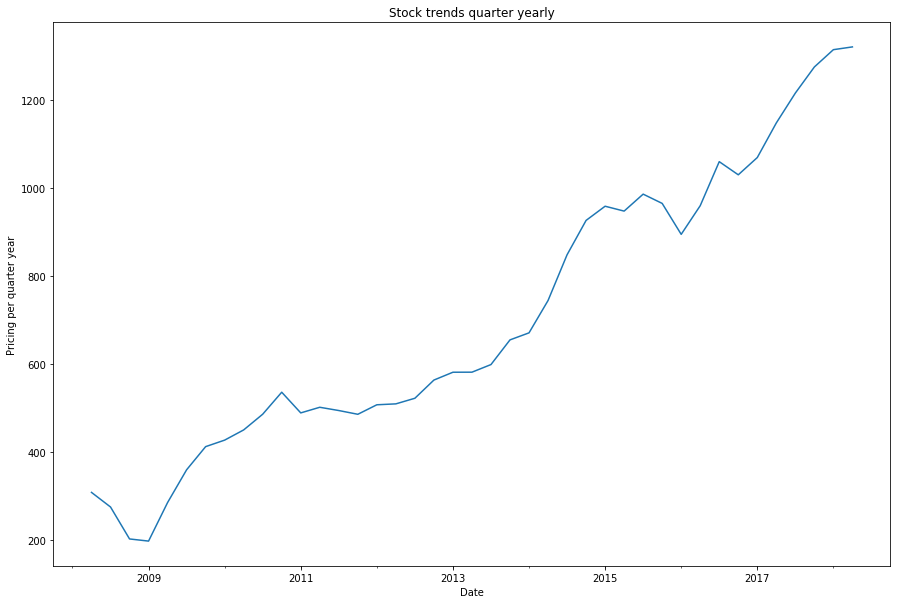

In [13]:
quarter = dataset.resample('Q').mean()
plt.ylabel("Pricing per quarter year")
plt.title("Stock trends quarter yearly")
quarter.plot()

In [14]:
from statsmodels.tsa.stattools import adfuller
dataset1 = dataset
dataset1.dropna(inplace = True)
def testStationarity(timeSeries):
    rolmean = pd.rolling_mean(timeSeries, window = 12)
    rolstd = pd.rolling_std(timeSeries, window = 12)
    
    original = plt.plot(timeSeries, color = 'green', label = 'Original')
    mean = plt.plot(rolmean, color = 'blue', label = 'Rolling mean')
    std = plt.plot(rolstd, color = 'yellow', label = 'Rolling standard deviation')
    plt.legend(loc = 'best')
    plt.title("Rolling Mean and Standard Deviation")
    plt.show(block = False)
    
    #Dickey Fuller Test
    print("Dickey Fuller Test on the Data")
    dfTest = adfuller(timeSeries)
    dfOutput = pd.Series(dfTest[0:4], index = ['Test statistic', 'p-Value', 'Lags used', 'Observations used'])
    for key, value in dfTest[4].items():
        dfOutput['Critical value(%s)' %key] = value
    print(dfOutput)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


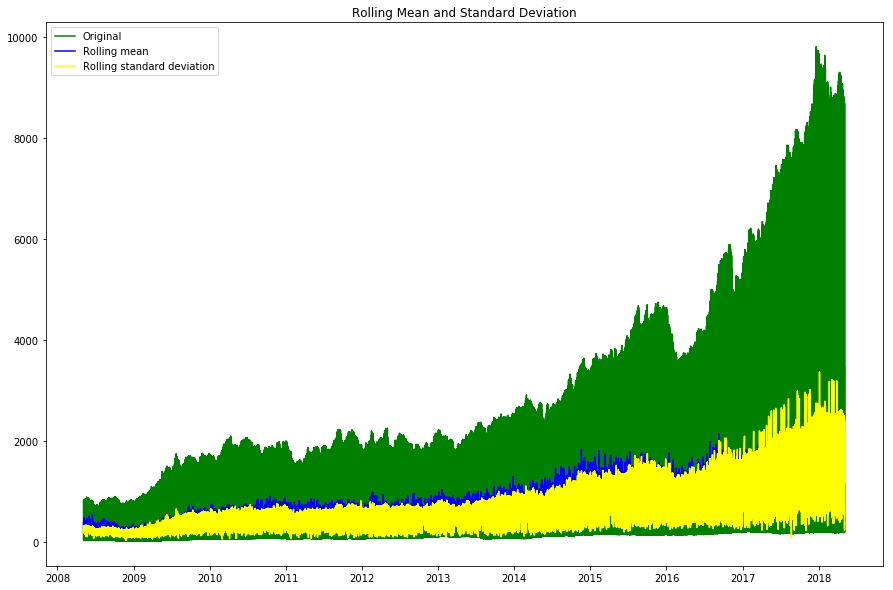

Dickey Fuller Test on the Data
Test statistic        -6.665269e+00
p-Value                4.735095e-09
Lags used              6.300000e+01
Observations used      7.300200e+04
Critical value(1%)    -3.430440e+00
Critical value(5%)    -2.861580e+00
Critical value(10%)   -2.566791e+00
dtype: float64


In [15]:
#Dickey Fuller Test on the data
testStationarity(dataset1)

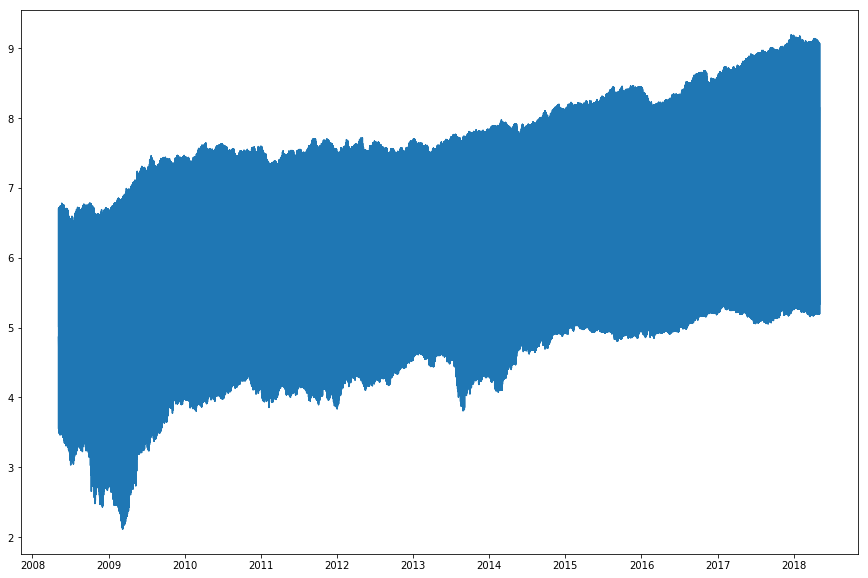

In [16]:
lndataset1 = np.log(dataset1)
plt.plot(lndataset1)

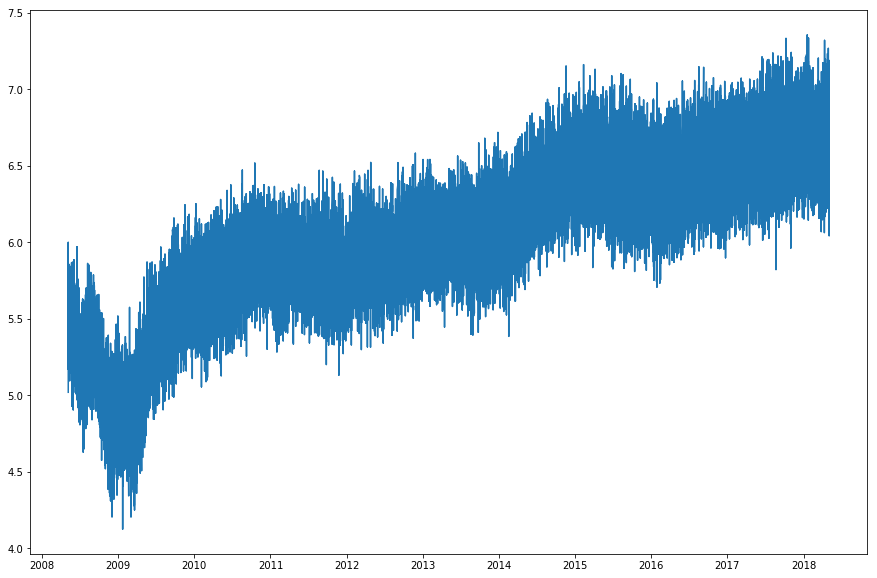

In [17]:
expWeightAvg = lndataset1.ewm(halflife = 5, min_periods = 0, adjust = True, ignore_na = False).mean()
plt.plot(expWeightAvg)

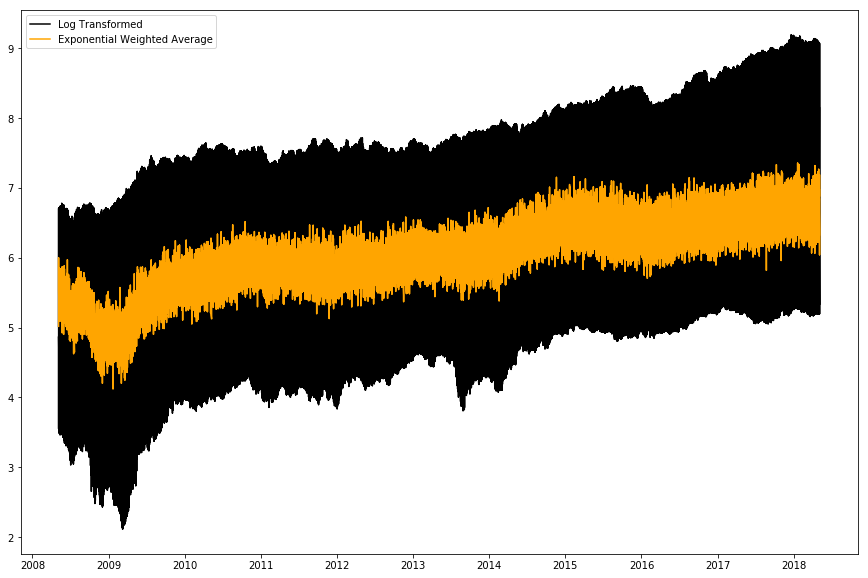

In [18]:
plt.plot(lndataset1, color = 'black', label = 'Log Transformed')
plt.plot(expWeightAvg, color = 'orange', label = 'Exponential Weighted Average')
plt.legend(loc = 'best')
plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


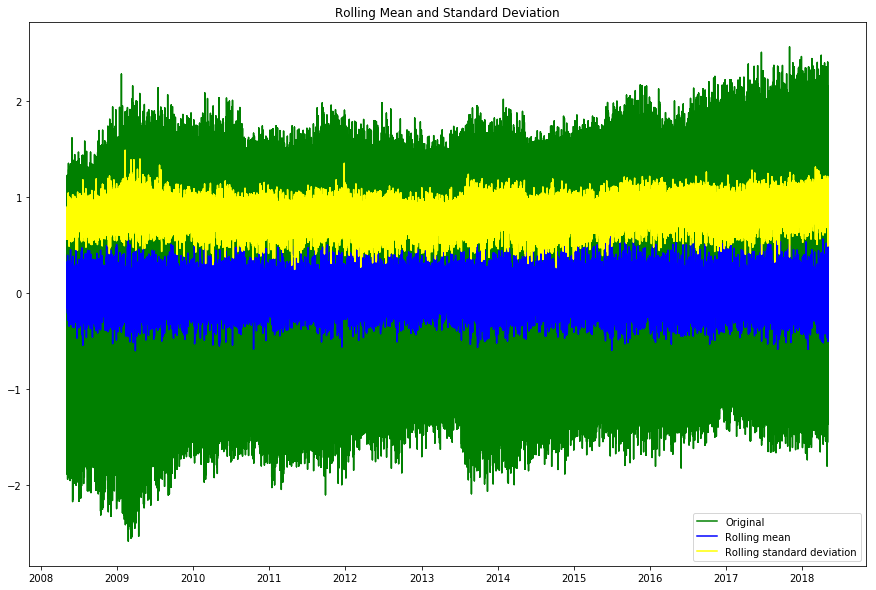

Dickey Fuller Test on the Data
Test statistic           -61.837650
p-Value                    0.000000
Lags used                 63.000000
Observations used      73002.000000
Critical value(1%)        -3.430440
Critical value(5%)        -2.861580
Critical value(10%)       -2.566791
dtype: float64


In [19]:
delta = lndataset1 - expWeightAvg
testStationarity(delta)

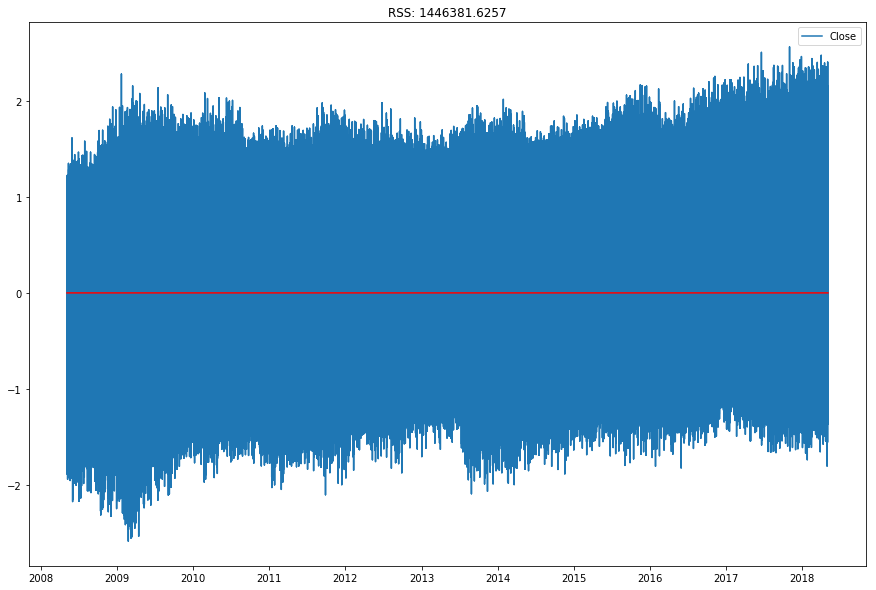

In [20]:
model = ARIMA(lndataset1, order = (0,1,0))
result = model.fit(disp = -1)
plt.plot(delta)
plt.plot(result.fittedvalues, color = 'red')
delta1 = result.fittedvalues - delta
delta1.dropna(inplace = True)
plt.title('RSS: %.4f' %sum(delta1**2))
plt.legend(loc = 'best')

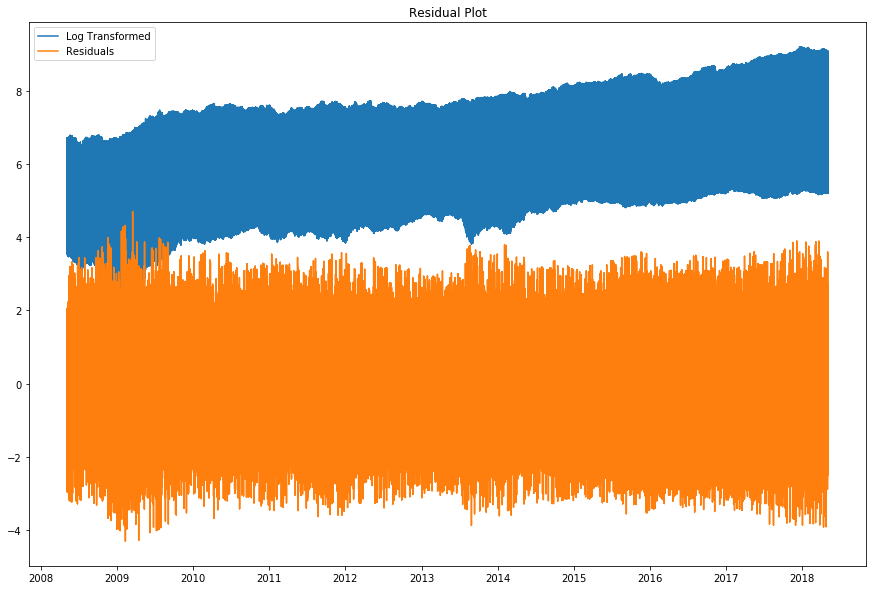

In [21]:
#Residual plot
plt.plot(lndataset1, label = 'Log Transformed')
plt.plot(result.resid, label = 'Residuals')
plt.title('Residual Plot')
plt.legend(loc = 'best')

Text(0.5,1,'Density Plot of Residual Error Values')

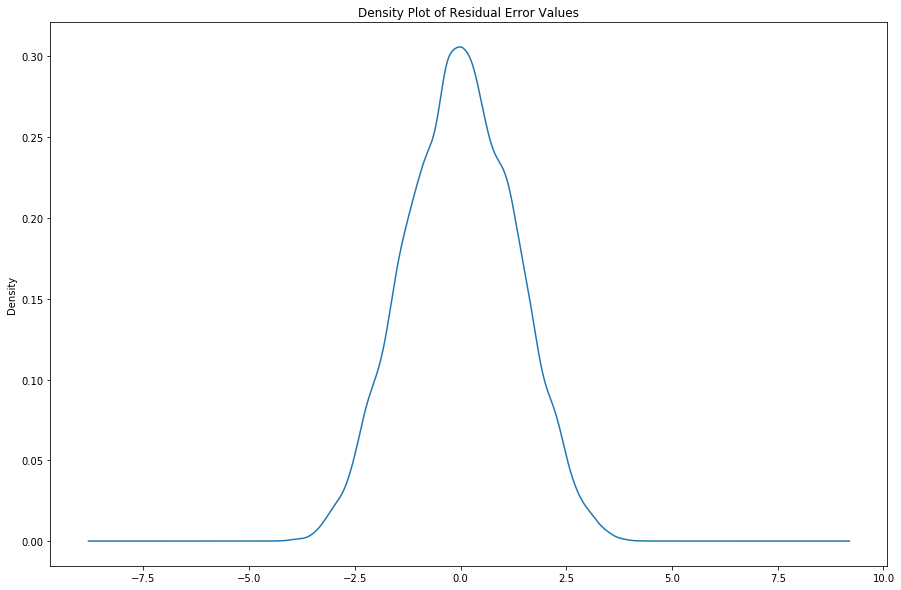

In [22]:
result.resid.plot(kind = 'kde')
plt.title('Density Plot of Residual Error Values')

In [35]:
result.resid.describe()

count    7.306500e+04
mean    -1.604593e-17
std      1.284605e+00
min     -4.300798e+00
25%     -9.044581e-01
50%      1.499451e-03
75%      9.132372e-01
max      4.695715e+00
dtype: float64